# Betel Vine Pest Detection

### !!! Run only once!!!

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

fatal: destination path 'yolov5' already exists and is not an empty directory.
fatal: Could not parse object 'fbe67e465375231474a2ad80a4389efc77ecff99'.


In [2]:
# move to yolov5 dir
%cd yolov5

C:\Users\ACER\Documents\My mini Projects\ML\Betel Leaves\pest_detection\yolov5


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt

In [4]:
! pip install torchvision
! pip install torch torchvision --upgrade
! pip install opencv-python albumentations

In [5]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cpu CPU


In [6]:
# move back to root dir
%cd ..

C:\Users\ACER\Documents\My mini Projects\ML\Betel Leaves\pest_detection


## Training and Validation Data Preparation

In [7]:
import os
import shutil
import random

In [8]:
# Define the path to your dataset
PEST_DATASET = '../../datasets/pests'
# Define the path to the directory where you want to save the train and test sets
TRAIN_DIR = f'{PEST_DATASET}/train'
TEST_DIR = f'{PEST_DATASET}/test'
CLASSES_FILE_PATH = '../datasets/pests/classes.txt'

In [9]:
# Create the train and test directories and their subdirectories
for dir in [TRAIN_DIR, TEST_DIR]:
    os.makedirs(os.path.join(dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dir, 'labels'), exist_ok=True)

# Get a list of all the image files in the dataset directory
image_files = [f for f in os.listdir(PEST_DATASET) if f.endswith('.jpg')]

# Shuffle the list of image files
random.shuffle(image_files)

# Split the image files into train and test sets
split_index = int(len(image_files) * 0.8)
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Move the train images and annotations to the train directories
for file_name in train_files:
    image_path = os.path.join(PEST_DATASET, file_name)
    label_path = os.path.join(PEST_DATASET, file_name.replace('.jpg', '.txt'))
    shutil.copy(image_path, os.path.join(TRAIN_DIR, 'images', file_name))
    shutil.copy(label_path, os.path.join(TRAIN_DIR, 'labels', file_name.replace('.jpg', '.txt')))

# Move the test images and annotations to the test directories
for file_name in test_files:
    image_path = os.path.join(PEST_DATASET, file_name)
    label_path = os.path.join(PEST_DATASET, file_name.replace('.jpg', '.txt'))
    shutil.copy(image_path, os.path.join(TEST_DIR, 'images', file_name))
    shutil.copy(label_path, os.path.join(TEST_DIR, 'labels', file_name.replace('.jpg', '.txt')))

### Setting up dataset paths for YOLO model

In [10]:
import yaml

# Load the YAML file
YAML_PATH = '../pest_detection/yolov5/data/coco128.yaml'
NEW_YAML_PATH = '../pest_detection/yolov5/data/custom_data.yaml'

current_path = os.getcwd()
print('Current working dir: ', current_path)

with open(YAML_PATH, 'r', encoding='utf-8') as f:
    data = yaml.safe_load(f)

# Define the mapping between class names and labels
with open(CLASSES_FILE_PATH, 'r') as f:
    class_names = [line.strip() for line in f]
label_map = {i: name for i, name in enumerate(class_names)}

# Modify the YAML data
if 'train' in data:
    data['train'] = 'train'
if 'val' in data:
    data['val'] = 'test'
data['path'] = PEST_DATASET
data['names'] = label_map
data['nc'] = len(class_names)

# Remove the 'download' key and value
data.pop('download', None)
data.pop('test', None)

# Save the modified YAML file
with open(NEW_YAML_PATH, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

Current working dir:  C:\Users\ACER\Documents\My mini Projects\ML\Betel Leaves\pest_detection


## Train YOLOv5 Model

  There is an import error due to a mismatch in the version of typing module. In Python 3.7, the OrderedDict is present in the collections module instead of the typing module.

You can try the following solution:

>Open the file maxvit.py located in `venv\lib\site-packages\torchvision\models` in a text editor.
Change the import statement`from typing import Any, Callable, List, Optional, OrderedDict, Sequence, Tuple` to `from collections import OrderedDict`.
Save the file and try running the train.py script again.
If the above solution doesn't work, you can try to upgrade the version of PyTorch and torchvision using pip:

In [11]:
# %cd yolov5

In [12]:
# ! python train.py --img 640 --batch 16 --epochs 1 --data custom_data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

In [13]:
 # %cd ..

### Try to Resume Training otherwise Start from Begining

In [14]:
from yolov5.train import run

args = {
    'img-size': 640,
    'batch': 16,
    'epochs': 1000,
    'data': 'custom_data.yaml',
    'cfg': 'yolov5s.yaml',
    'weights': 'yolov5s.pt',
    'verbose':True
}

try:
    print('\n\n===============================================')
    print('TRAINING RESUMED....')
    print('===============================================')
    opt = run(resume=True)
except:
    print('Failed to Resume Training!!!\n\n===============================================')
    print('TRAINING STARTED FROM Beginning....')
    print('===============================================')
    opt = run(**args)

train: weights=yolov5\yolov5s.pt, cfg=, data=yolov5\data\coco128.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 10 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  2023-5-12 Python-3.7.0 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch



TRAINING RESUMED....
requirements: C:\Users\ACER\Documents\My mini Projects\ML\Betel Leaves\pest_detection\requirements.txt not found, check failed.
Failed to Resume Training!!!

TRAINING STARTED FROM Beginning....
requirements: C:\Users\ACER\Documents\My mini Projects\ML\Betel Leaves\pest_detection\requirements.txt not found, check failed.


KeyboardInterrupt: 

### Evaluation

In [19]:
from yolov5.utils.plots import plot_results
import glob

# get a list of all the experiment folders sorted by creation time
exp_folders = sorted(glob.glob('./yolov5/runs/train/exp*/'), key=os.path.getmtime)

try:
    # get the last experiment folder
    last_exp_folder = exp_folders[-1]

    # get the path to the result.csv file in the last experiment folder
    result_csv_path = os.path.join(last_exp_folder, 'results.csv')
    result_png_path = os.path.join(last_exp_folder, 'results.png')

    plot_results(result_csv_path)  # plot 'results.csv' as 'results.png'
except AssertionError:
    print('failed to open from last exp_folder. Opening the previous...')
    # get the last experiment folder
    last_exp_folder = exp_folders[-2]

    # get the path to the result.csv file in the last experiment folder
    result_csv_path = os.path.join(last_exp_folder, 'results.csv')
    result_png_path = os.path.join(last_exp_folder, 'results.png')

    plot_results(result_csv_path)  # plot 'results.csv' as 'results.png'

failed to open from last exp_folder. Opening the previous...


In [21]:
import pandas as pd

results_df = pd.read_csv(result_csv_path, index_col=False)
print(f'YOLOv5 model has trained for {results_df.shape[0]} times.')

pd.set_option('display.max_columns', None)  # to show all columns
results_df.head(-5)

YOLOv5 model has trained for 9 times.


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.12092,0.039402,0.031015,0.001429,0.055556,0.001040,0.000104,0.12122,0.047761,0.031338,0.100000,0.000000,0.000000
1,1,0.12761,0.058782,0.031874,0.001672,0.055556,0.002139,0.001070,0.12638,0.042508,0.033494,0.099100,0.000100,0.000100
2,2,0.12773,0.054613,0.032160,0.001672,0.055556,0.002380,0.001190,0.12612,0.042601,0.033571,0.098200,0.000200,0.000200
3,3,0.12561,0.050763,0.031438,0.001661,0.055556,0.002329,0.001164,0.12548,0.042918,0.033739,0.097299,0.000299,0.000299


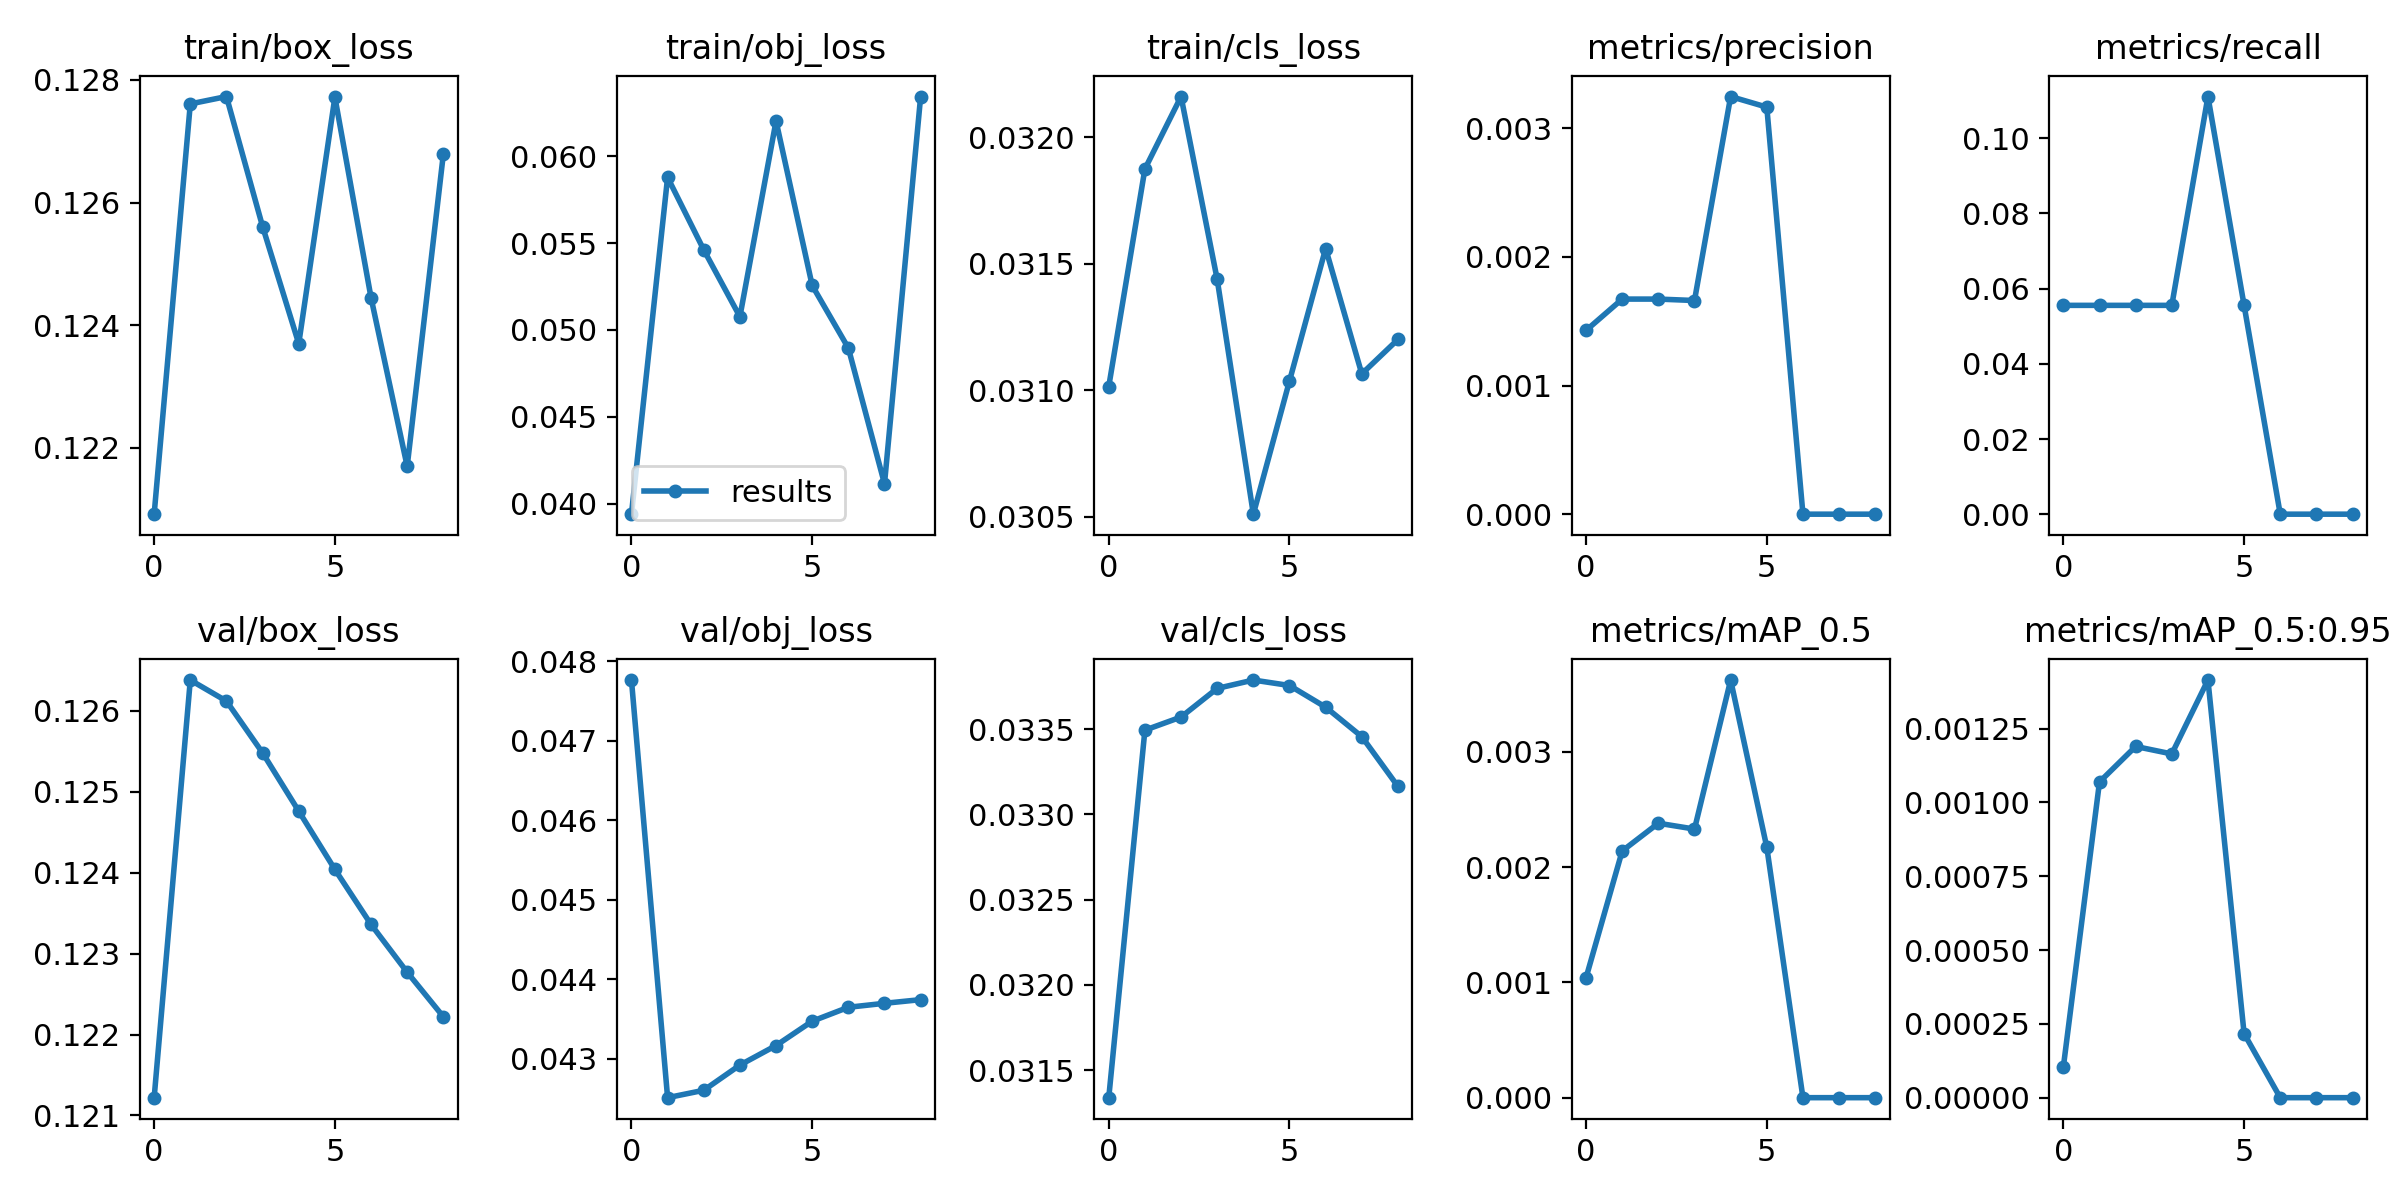

In [18]:
from IPython.display import Image
Image(filename=result_png_path)
